In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

In [30]:
def generate_dataset_1(mean, n=500):
    # Create empty lists to store dataset
    x1_list = []
    x2_list = []
    y_list = []

    # Generate data for class y = 0
    for i in range(n):
        x1 = np.random.normal(0, 1)
        x2 = np.random.normal(0, 1)
        y = 0
        x1_list.append(x1)
        x2_list.append(x2)
        y_list.append(y)

    # Generate data for class y = 1
    for i in range(n):
        x1 = np.random.normal(mean, 1)
        x2 = np.random.normal(mean, 1)
        y = 1
        x1_list.append(x1)
        x2_list.append(x2)
        y_list.append(y)

    # Combine data into pandas dataframe
    df = pd.DataFrame({'x1': x1_list, 'x2': x2_list, 'y': y_list})
    df = df.sample(frac=1).reset_index(drop=True)

    return df


def generate_dataset_2(n=500, noise_variance=0.1):
    # Create empty lists to store dataset
    x1_list = []
    x2_list = []
    y_list = []

    # Generate data for class y = 1
    for i in range(n):
        x1 = np.random.uniform(-1, 1)
        x2 = np.sqrt(1 - x1**2) * np.random.choice([-1, 1])
        noise_x1 = np.random.normal(0, noise_variance)
        noise_x2 = np.random.normal(0, noise_variance)
        x1 += noise_x1
        x2 += noise_x2
        y = 1
        x1_list.append(x1)
        x2_list.append(x2)
        y_list.append(y)

    # Generate data for class y = 0
    for i in range(n):
        x1 = np.random.uniform(-2, 2)
        x2 = np.sqrt(4 - x1**2) * np.random.choice([-1, 1])
        noise_x1 = np.random.normal(0, noise_variance)
        noise_x2 = np.random.normal(0, noise_variance)
        x1 += noise_x1
        x2 += noise_x2
        y = 0
        x1_list.append(x1)
        x2_list.append(x2)
        y_list.append(y)

    # Combine data into pandas dataframe
    df = pd.DataFrame({'x1': x1_list, 'x2': x2_list, 'y': y_list})
    df = df.sample(frac=1).reset_index(drop=True)

    return df



def plot_dataset(df, title="Plot"):
    # Separate data by class
    class_0 = df[df['y'] == 0]
    class_1 = df[df['y'] == 1]

    # Plot the data
    fig, ax = plt.subplots(figsize=(10, 7))

    ax.scatter(class_0['x1'], class_0['x2'], color='b', label='Class 0')
    ax.scatter(class_1['x1'], class_1['x2'], color='r', label='Class 1')


    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend(loc='best')

    plt.show()

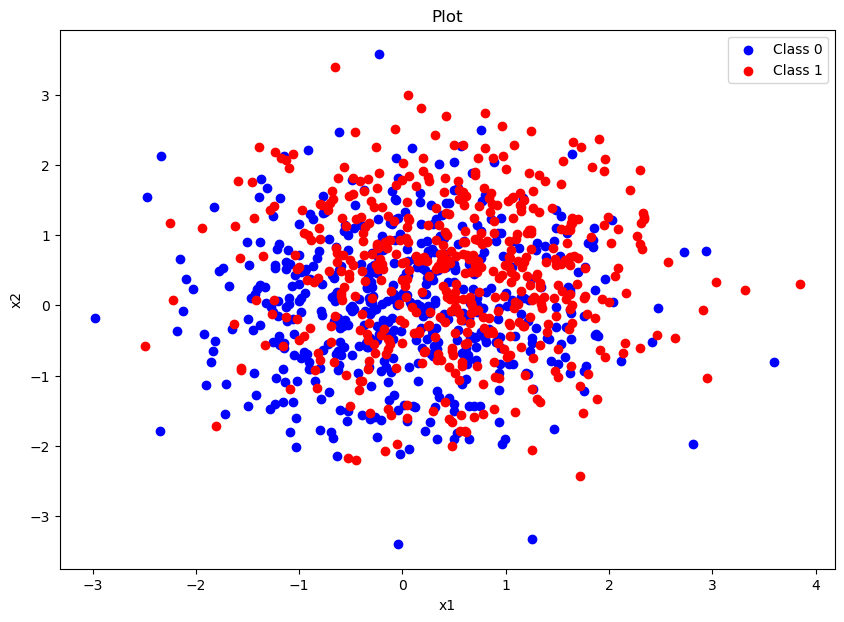

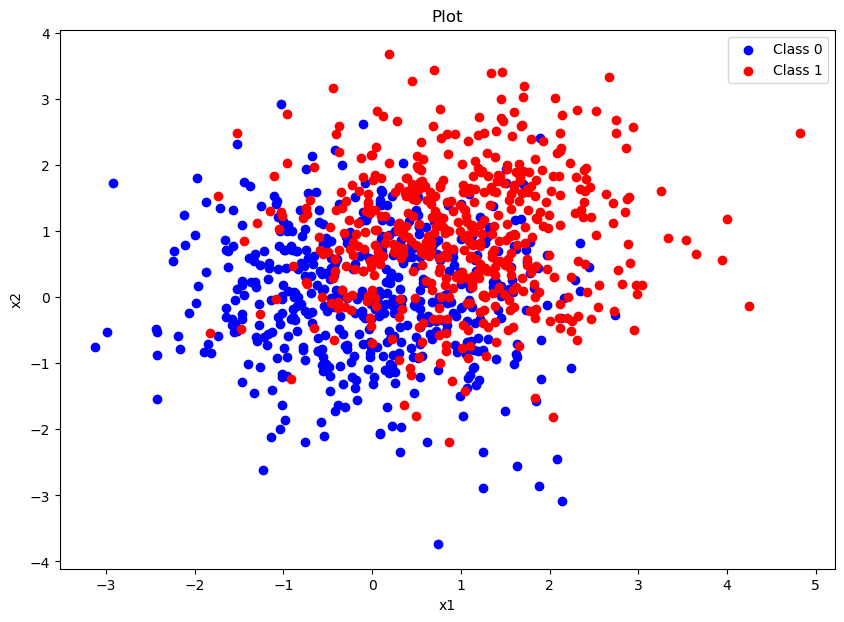

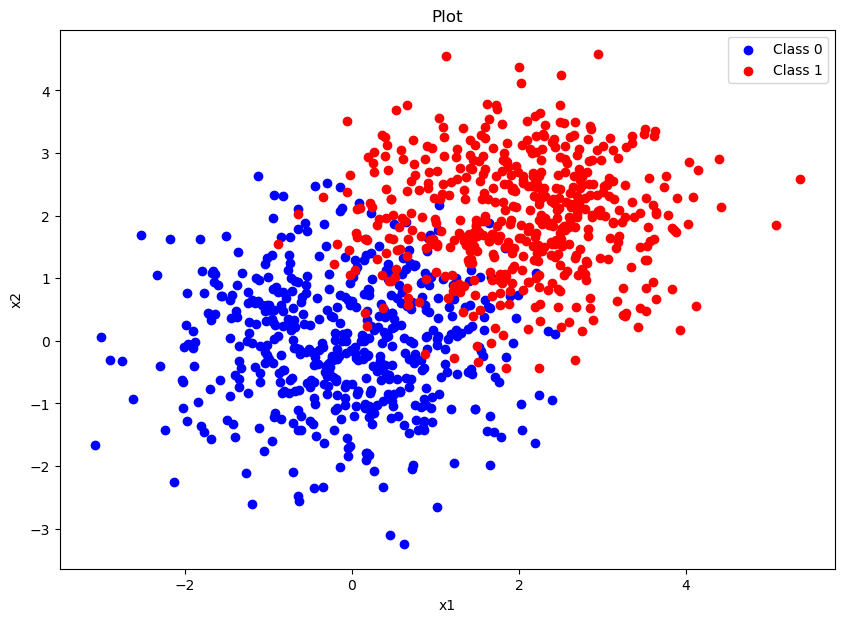

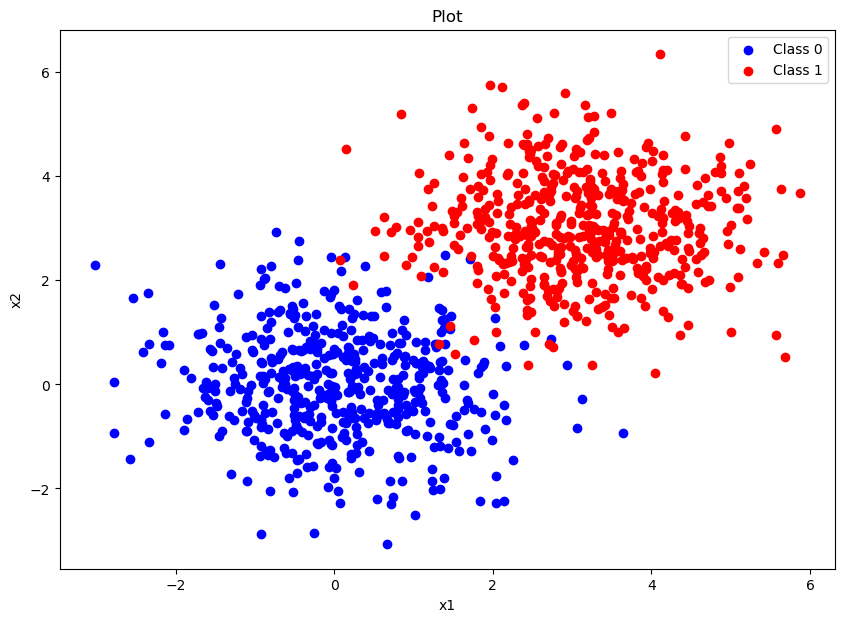

In [28]:
means = [0.5, 1, 2, 3]
for m in means:
    df = generate_dataset_1(m)
    plot_dataset(df)




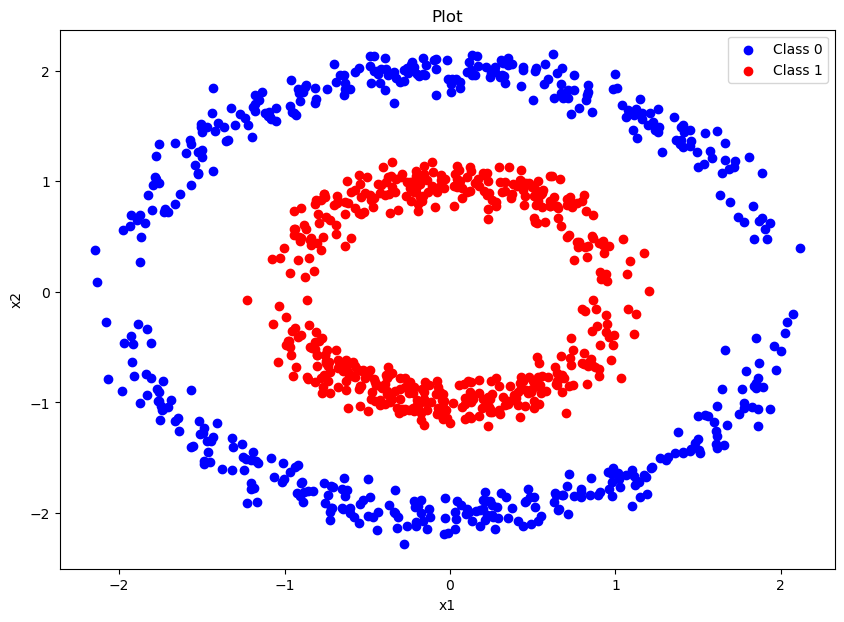

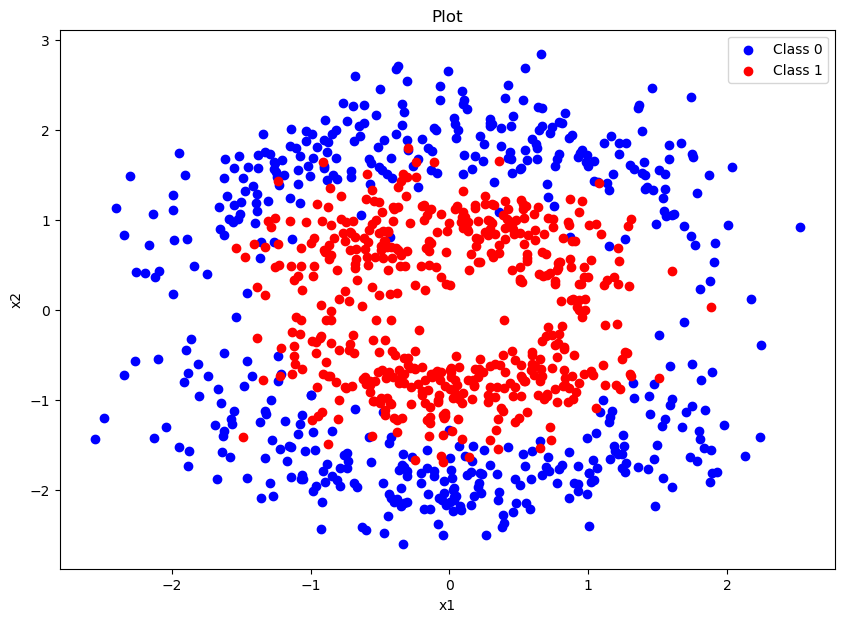

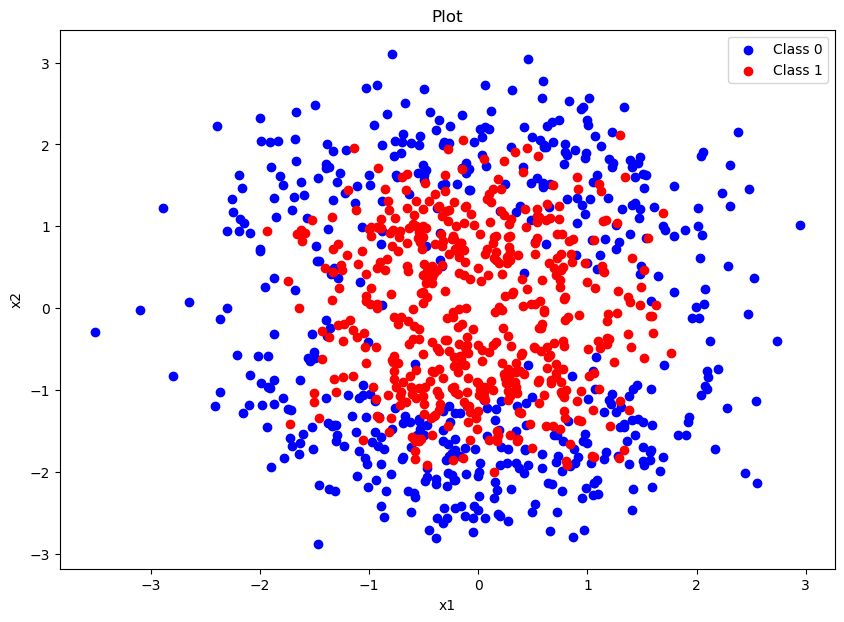

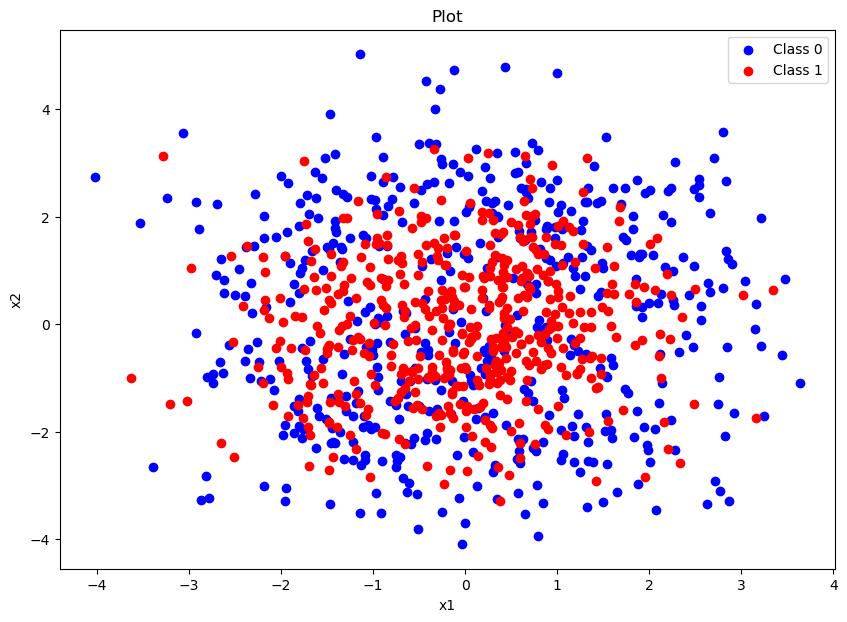

In [32]:
noise_var = [0.1, 0.3, 0.5, 1]
for nv in noise_var:
    df2 = generate_dataset_2(noise_variance=nv)
    plot_dataset(df2)

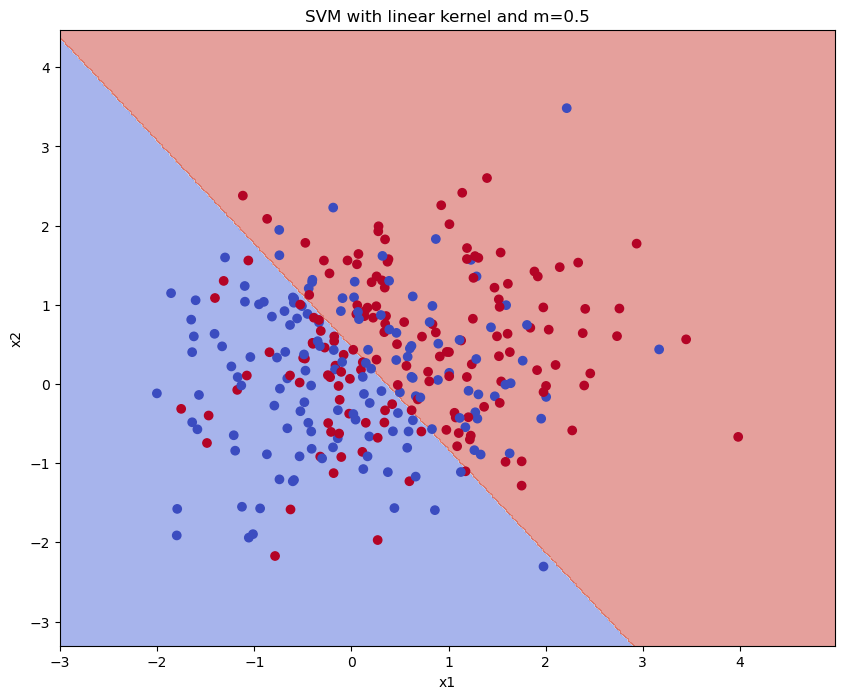

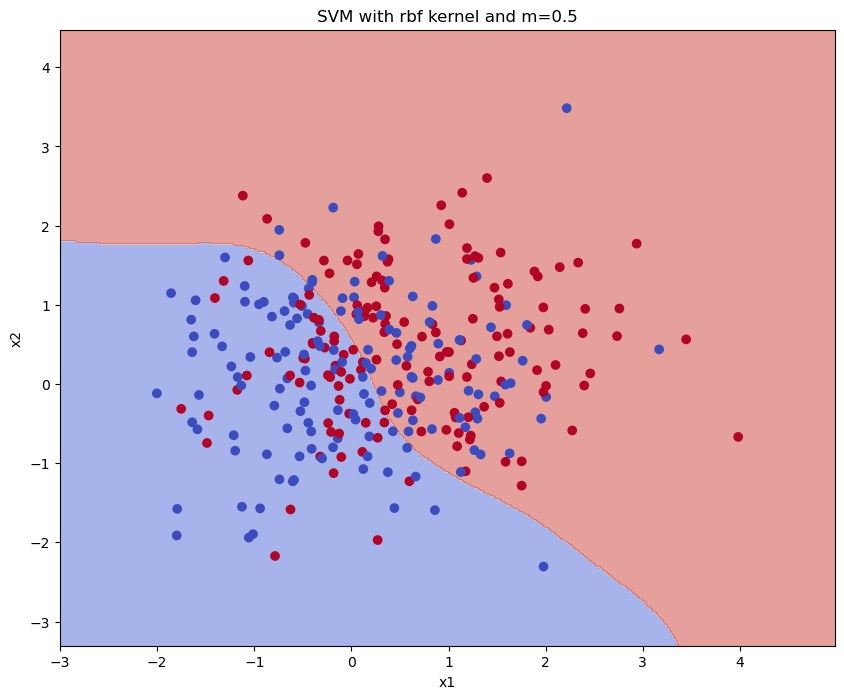

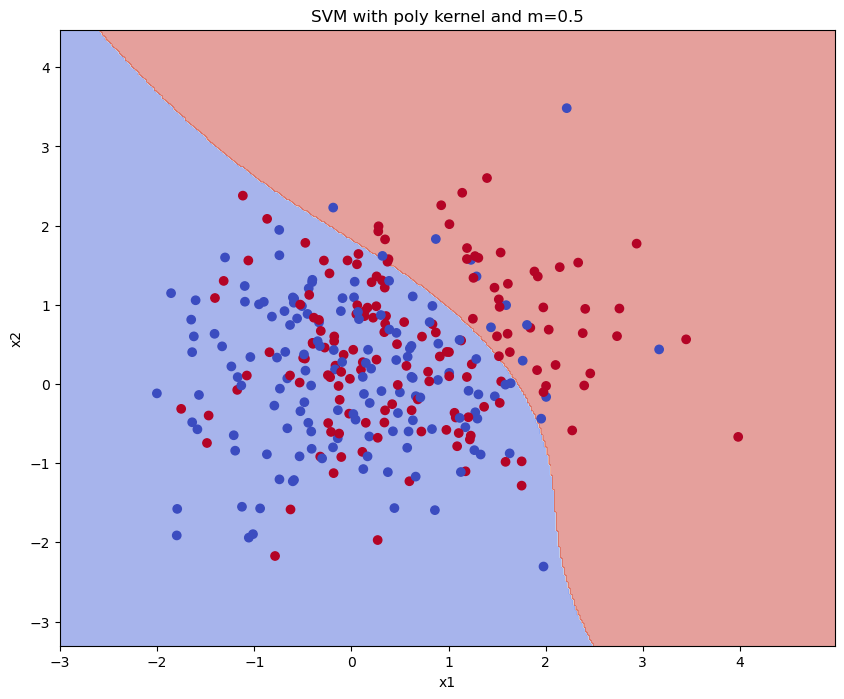

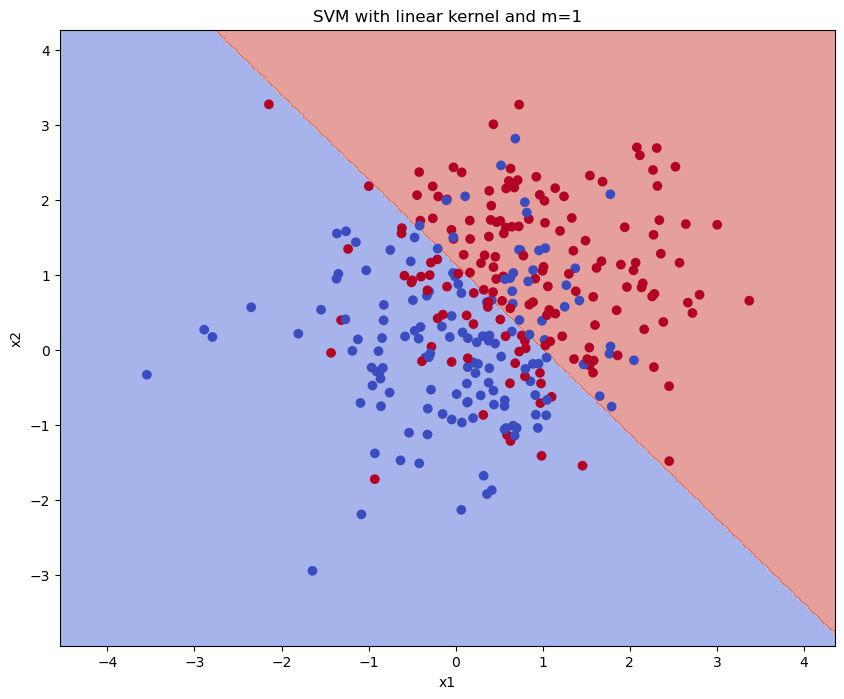

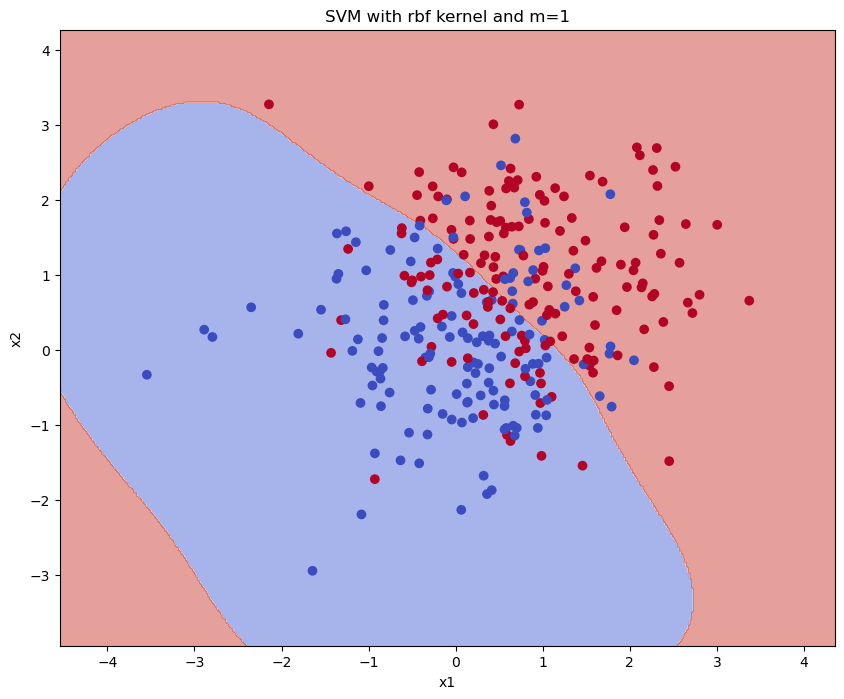

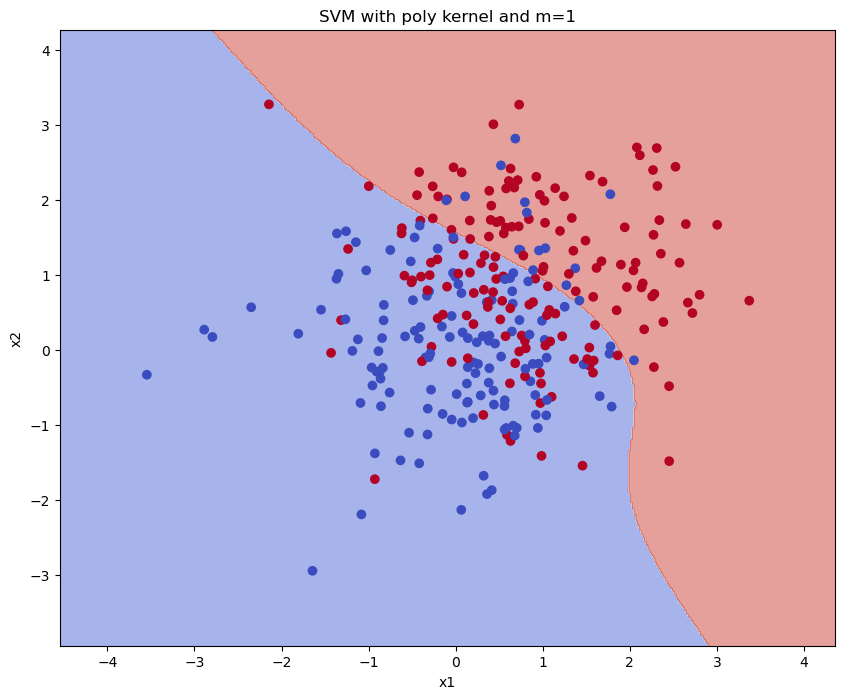

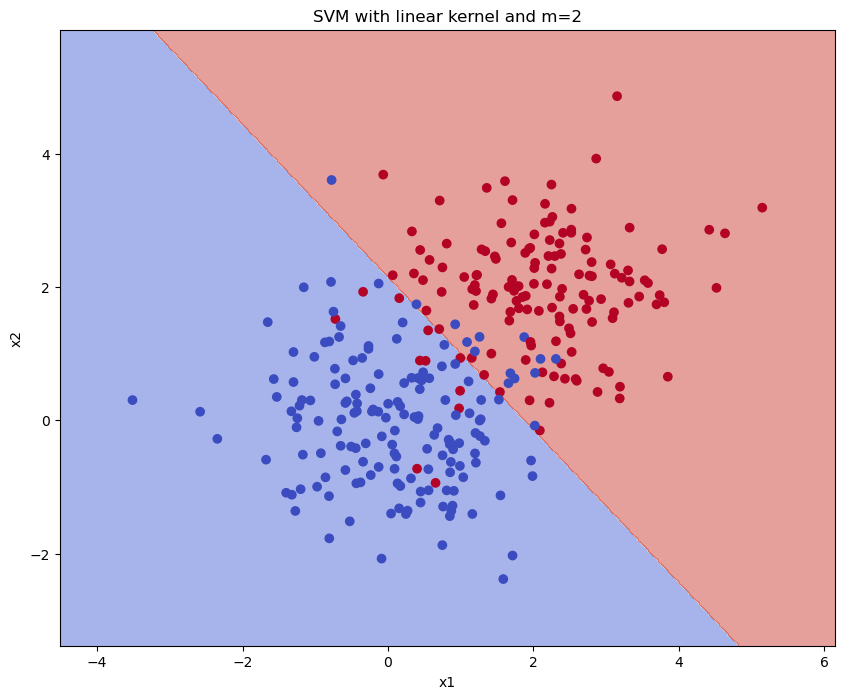

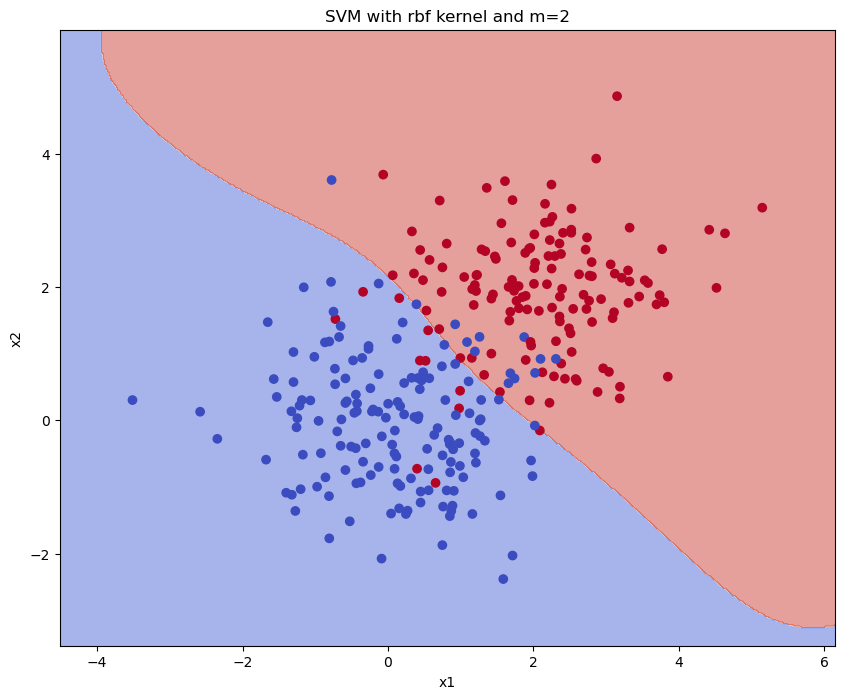

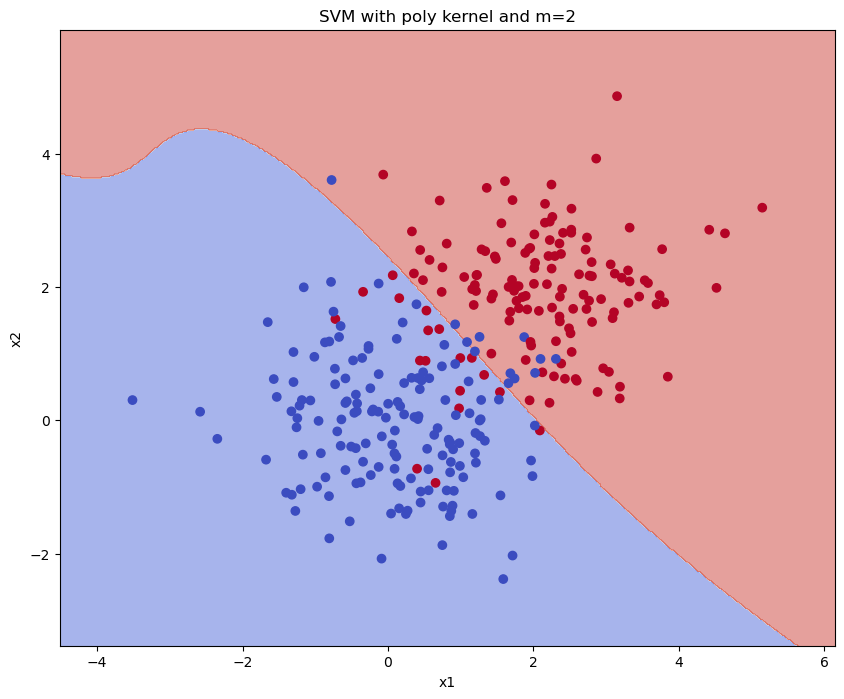

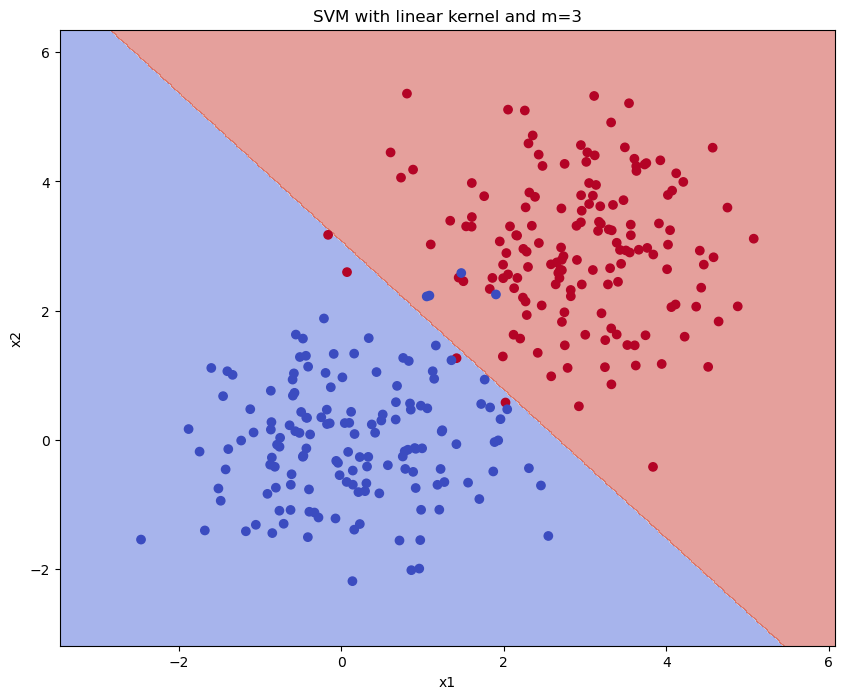

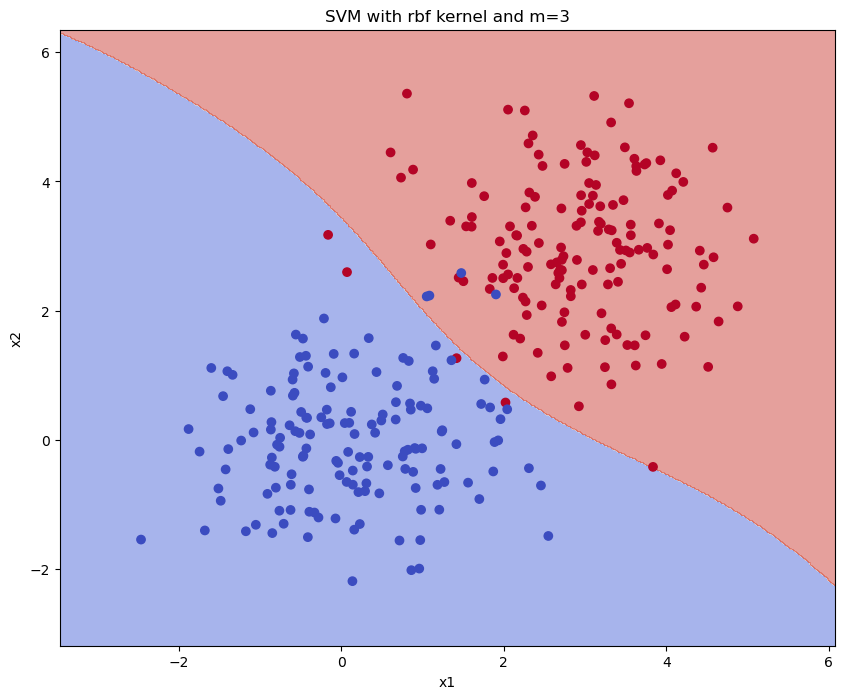

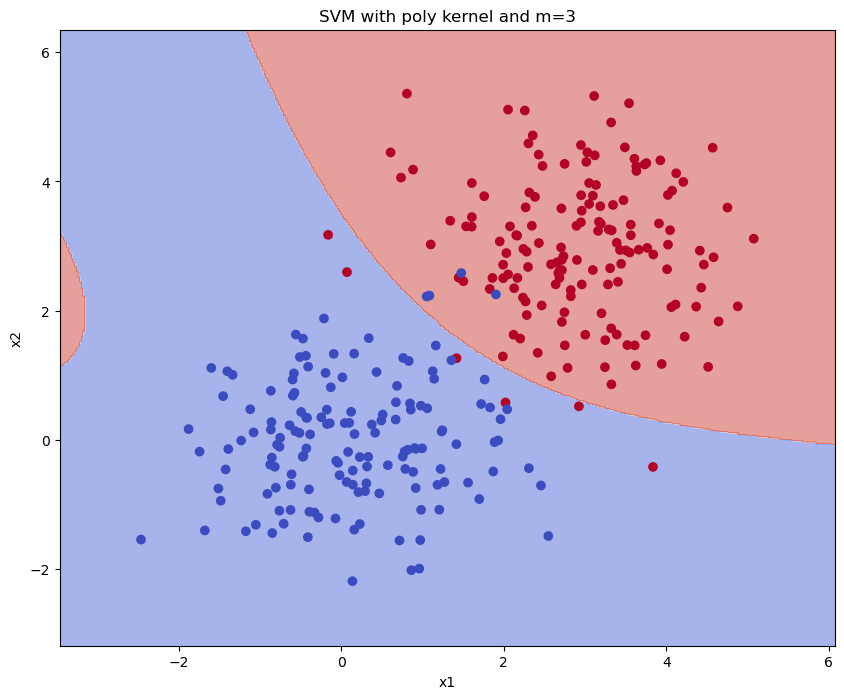

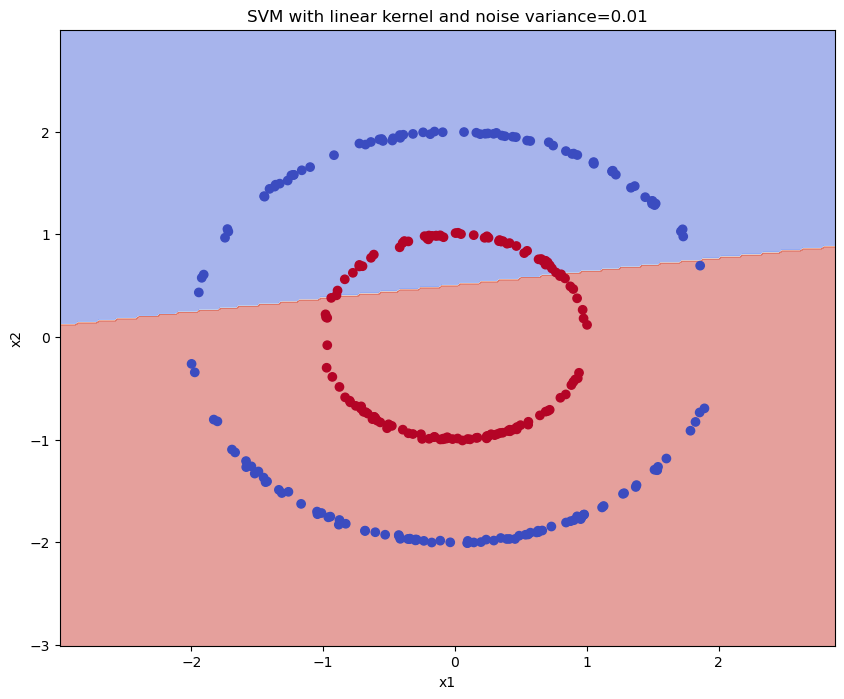

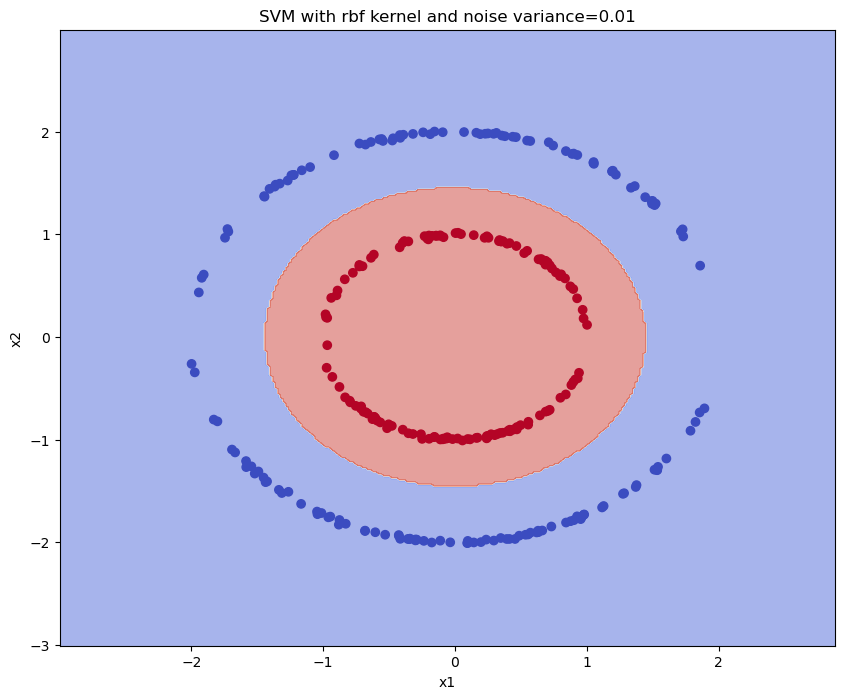

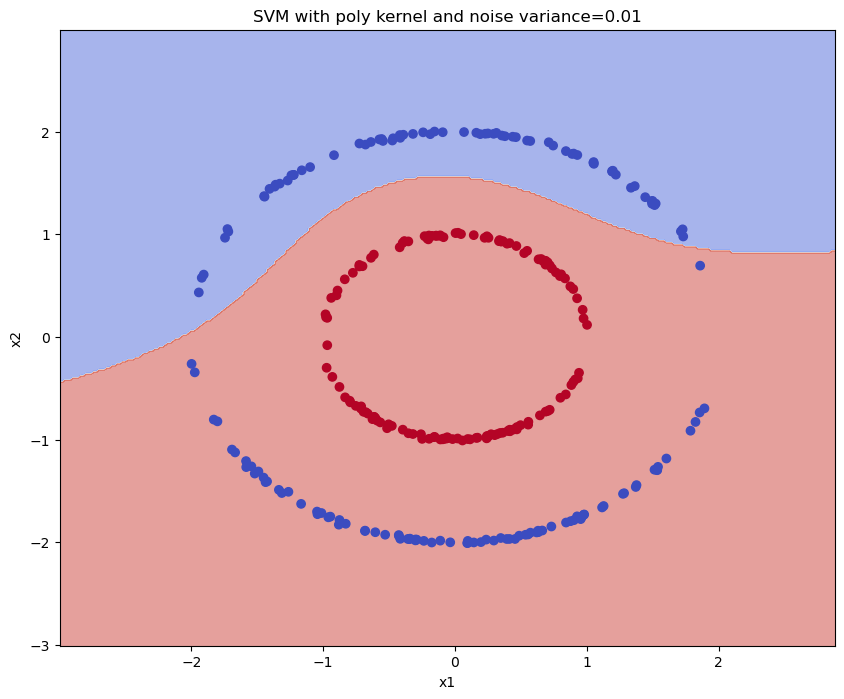

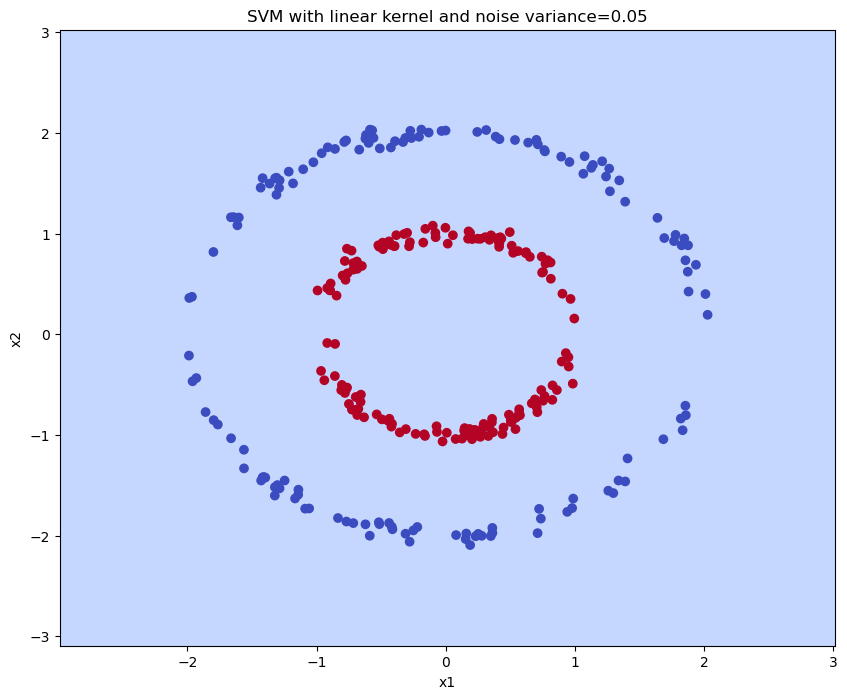

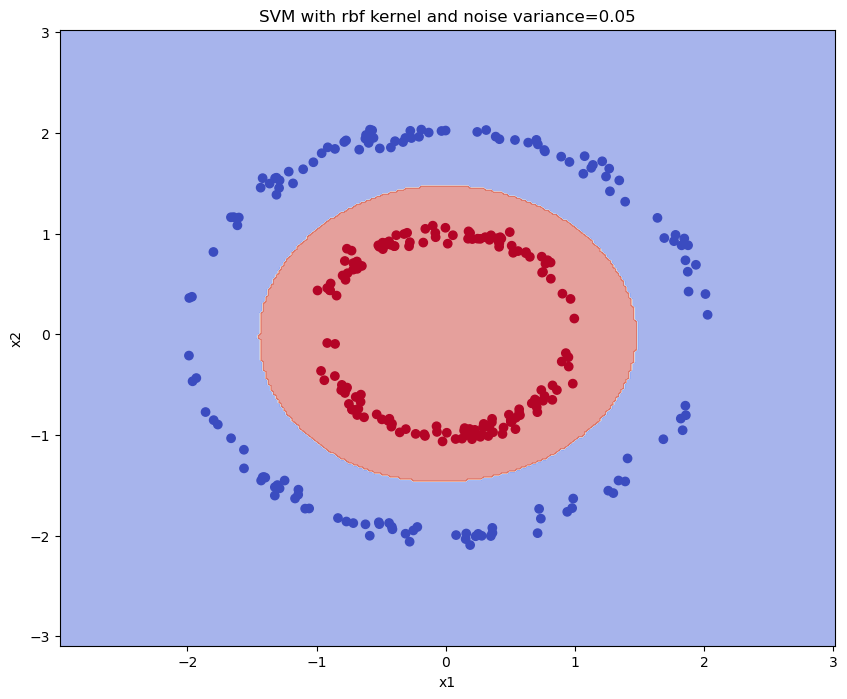

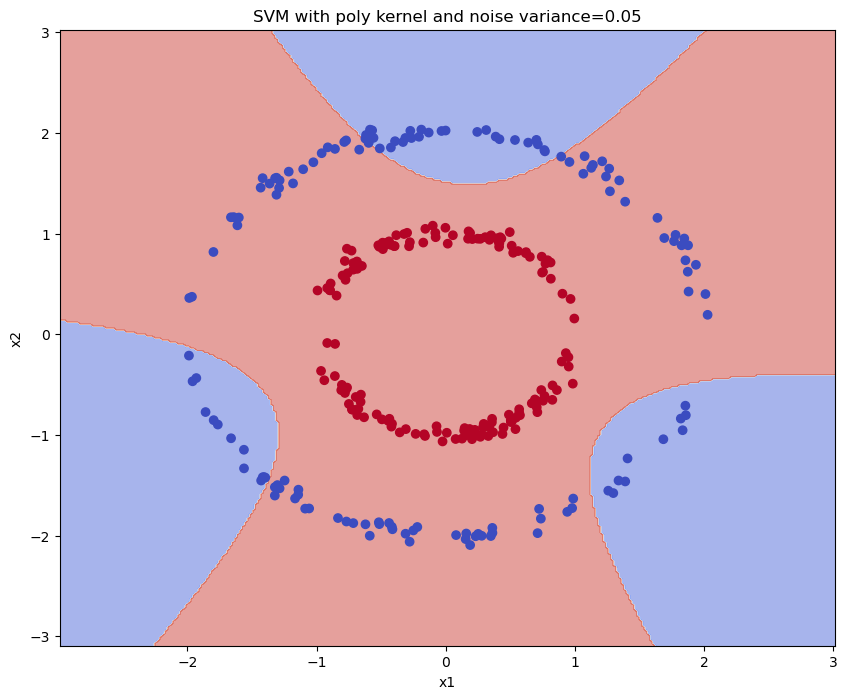

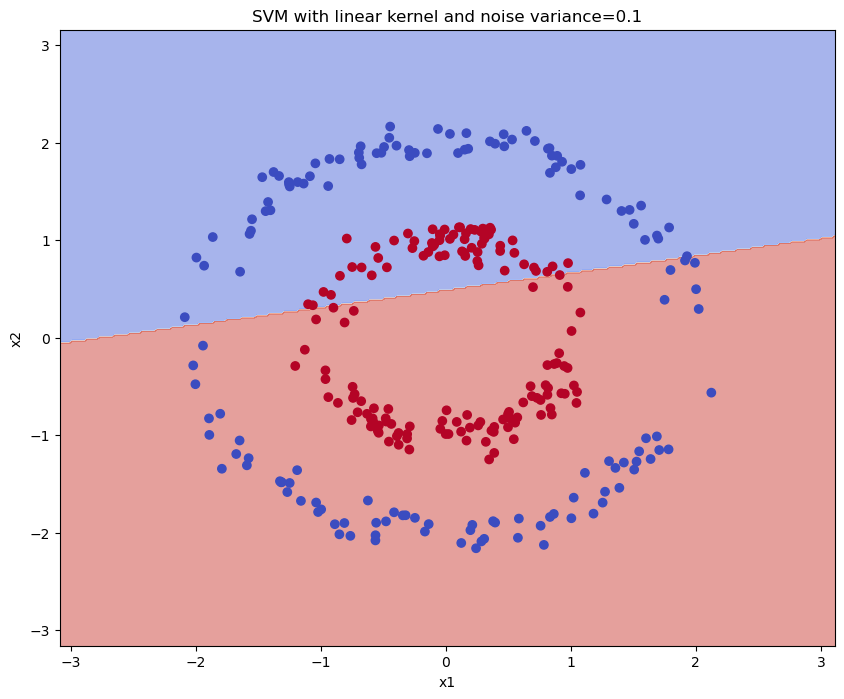

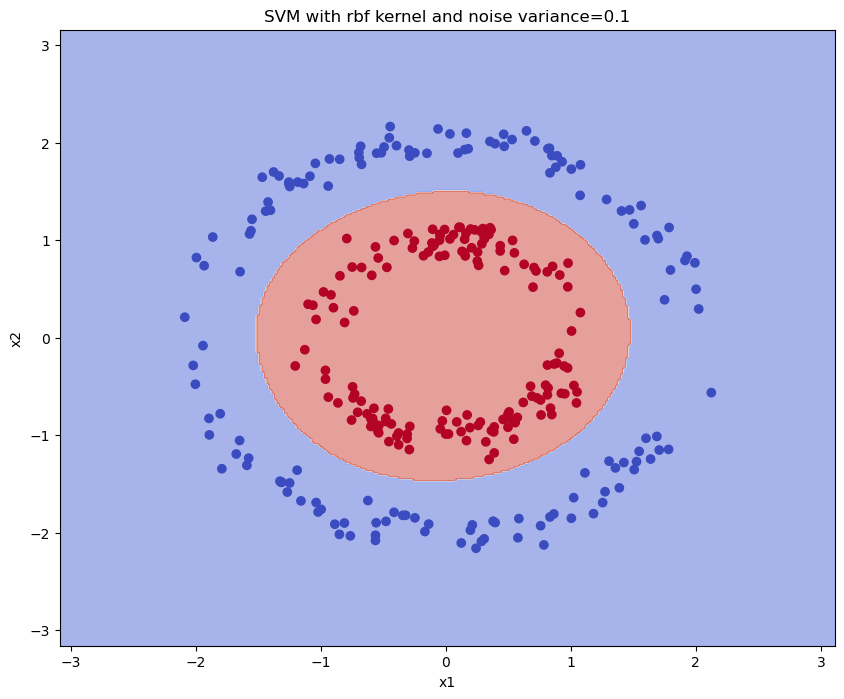

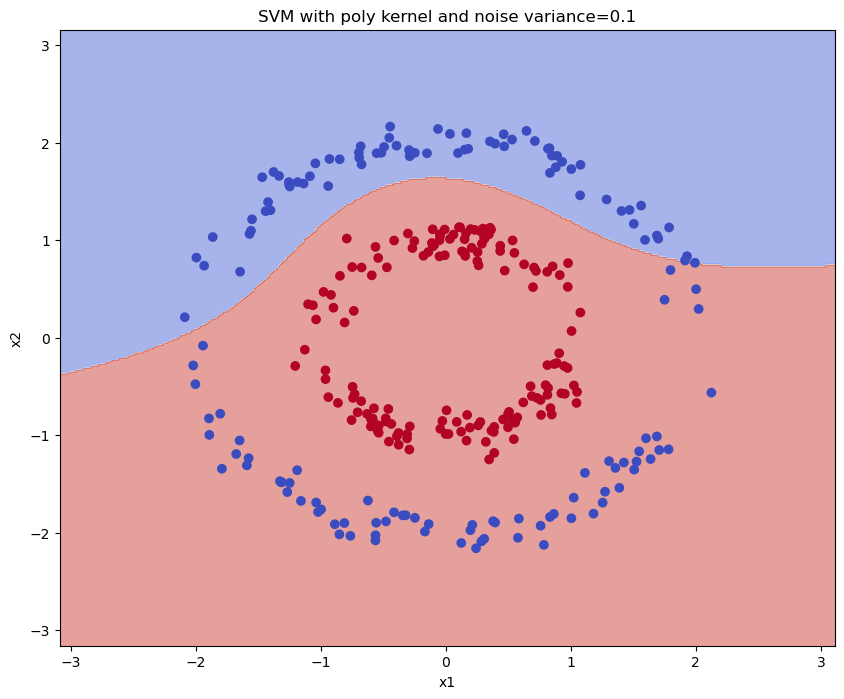

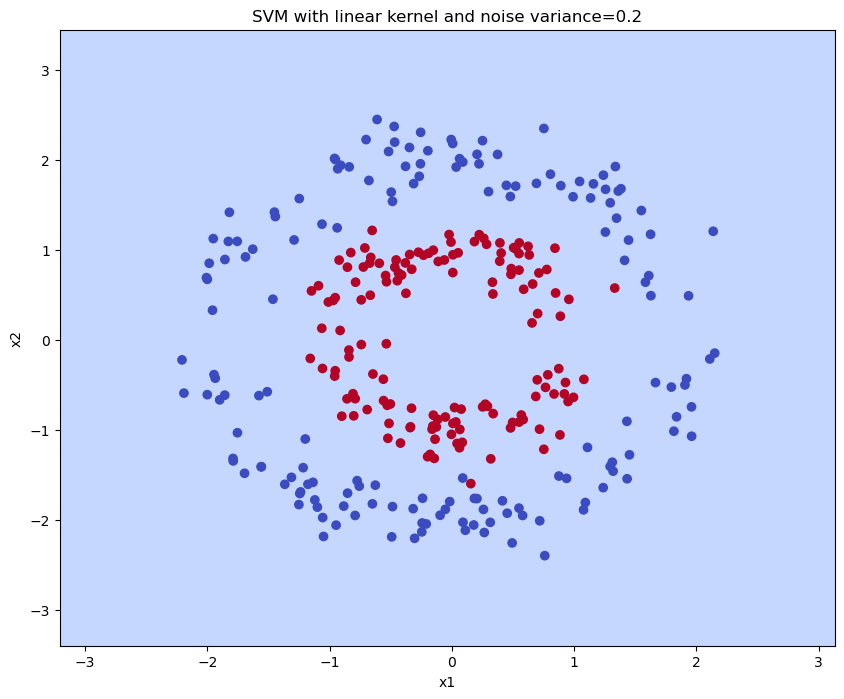

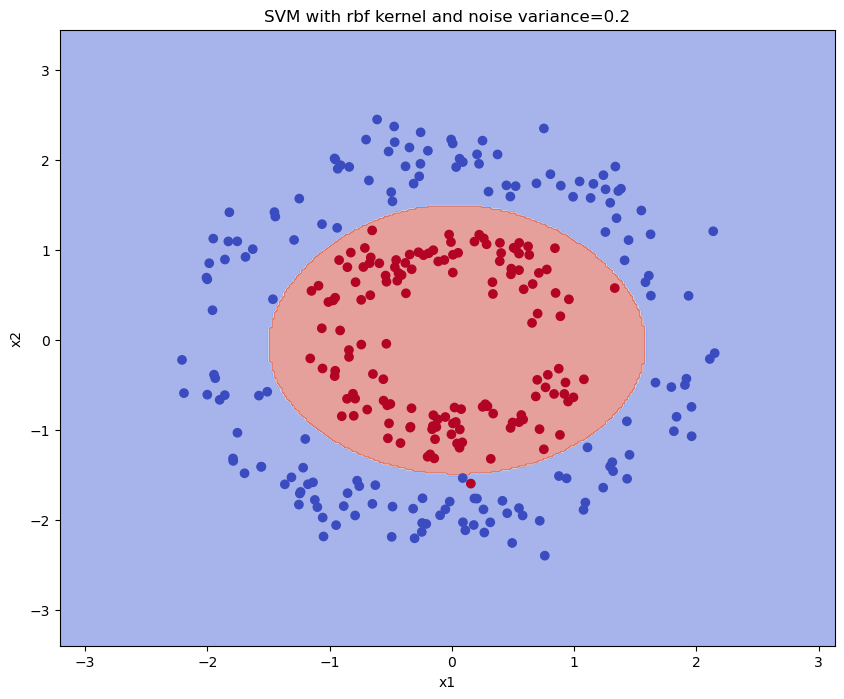

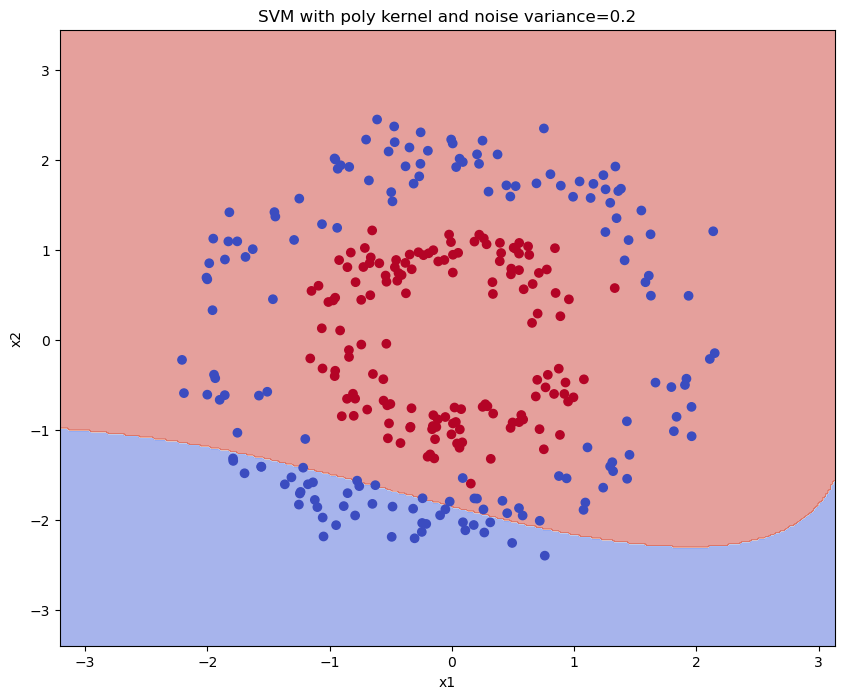

In [33]:
# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

# Generate Dataset 1 with different values of m
for m in [0.5, 1, 2, 3]:
    # Generate dataset
    df = generate_dataset_1(mean=m)

    # Split dataset into features (X) and labels (y)
    X = df[['x1', 'x2']].values
    y = df['y'].values

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Run SVM with different kernel functions and visualize the results
    for kernel in ['linear', 'rbf', 'poly']:
        clf = svm.SVC(kernel=kernel)
        clf.fit(X_train, y_train)
        plt.figure(figsize=(10, 8))
        plot_decision_boundary(clf, X_test, y_test, f'SVM with {kernel} kernel and m={m}')
        plt.show()

# Generate Dataset 2 with different values of noise variance
for var in [0.01, 0.05, 0.1, 0.2]:
    # Generate dataset
    df = generate_dataset_2(noise_variance=var)

    # Split dataset into features (X) and labels (y)
    X = df[['x1', 'x2']].values
    y = df['y'].values

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Run SVM with different kernel functions and visualize the results
    for kernel in ['linear', 'rbf', 'poly']:
        clf = svm.SVC(kernel=kernel)
        clf.fit(X_train, y_train)
        plt.figure(figsize=(10, 8))
        plot_decision_boundary(clf, X_test, y_test, f'SVM with {kernel} kernel and noise variance={var}')
        plt.show()